In [3]:
import pandas as pd

In [6]:
xls = pd.ExcelFile("yelp.xlsx")
df = xls.parse("yelp_data")
df.head()

C:\Users\Abdulqaadir\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,name,category_0,category_1,take_out,review_count,stars,city_id,state_id
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1


In [7]:
df["name"]

0                           China Sea Chinese Restaurant
1                                   Discount Tire Center
2                                           Frankfurters
3                                      Fred Dietz Floral
4                                          Kuhn's Market
                             ...                        
595    Republic Services of Southern Nevada Recycling...
596                                         SA Recycling
597                                      Jack In the Box
598                                 Custom Hearth & Door
599                                     A Sunrise Towing
Name: name, Length: 600, dtype: object

In [8]:
atts = ["name", "stars"]

In [12]:
df[atts].head(4)

,name,stars
0,China Sea Chinese Restaurant,2.5
1,Discount Tire Center,4.5
2,Frankfurters,4.5
3,Fred Dietz Floral,4.0


In [13]:
df.columns

Index(['name', 'category_0', 'category_1', 'take_out', 'review_count', 'stars',
       'city_id', 'state_id'],
      dtype='object')

In [15]:
df.dtypes

name             object
category_0       object
category_1       object
take_out           bool
review_count      int64
stars           float64
city_id           int64
state_id          int64
dtype: object

In [18]:
len(df["name"])

600

In [17]:
df.count

<bound method DataFrame.count of                                                   name      category_0  \
0                         China Sea Chinese Restaurant     Restaurants   
1                                 Discount Tire Center           Tires   
2                                         Frankfurters     Restaurants   
3                                    Fred Dietz Floral        Shopping   
4                                        Kuhn's Market            Food   
..                                                 ...             ...   
595  Republic Services of Southern Nevada Recycling...  Local Services   
596                                       SA Recycling  Local Services   
597                                    Jack In the Box     Restaurants   
598                               Custom Hearth & Door        Shopping   
599                                   A Sunrise Towing      Automotive   

                          category_1  take_out  review_count  stars  city_id  

In [19]:
df.describe()

,review_count,stars,city_id,state_id
count,600.000000,600.000000,600.000000,600.000000
mean,33.771667,3.495000,9.193333,1.500000
std,86.901895,0.955596,2.997933,0.500417
min,3.000000,1.000000,1.000000,1.000000
25%,5.000000,3.000000,8.000000,1.000000
50%,10.000000,3.500000,10.500000,1.500000
75%,25.250000,4.000000,12.000000,2.000000
max,1305.000000,5.000000,13.000000,2.000000


In [28]:
df[1:4]

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1


In [29]:
cities = xls.parse("cities")

C:\Users\Abdulqaadir\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [31]:
cities.head()

,id,city
0,1,Bellevue
1,2,Braddock
2,3,Carnegie
3,4,Homestead
4,5,Mc Kees Rocks


In [30]:
states = xls.parse("states")

C:\Users\Abdulqaadir\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [32]:
states.head()

,id,state
0,1,PA
1,2,NV


In [36]:
df = pd.merge(left = df, right = cities, left_on = "city_id", right_on = "id", how = "inner")

In [37]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,id,city
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,1,Bellevue
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,1,Bellevue
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,1,Bellevue
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,1,Bellevue
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,1,Bellevue


In [38]:
df = pd.merge(left = df, right = states, how = "inner", left_on = "state_id", right_on = "id")

In [39]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,id_x,city,id_y,state
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,1,Bellevue,1,PA
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,1,Bellevue,1,PA
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,1,Bellevue,1,PA
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,1,Bellevue,1,PA
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,1,Bellevue,1,PA


In [40]:
del df["id_x"]
del df["id_y"]

In [42]:
df.columns

Index(['name', 'category_0', 'category_1', 'take_out', 'review_count', 'stars',
       'city_id', 'state_id', 'city', 'state'],
      dtype='object')

In [43]:
#Bars in Carnegie
#Bars and Restaurents in Carnegie (city)

In [44]:
cat_0_bars = df["category_0"] == "Bars"
cat_1_bars = df["category_1"] == "Bars"
city_carnegie = df["city"] == "Carnegie"

In [45]:
df[(cat_0_bars | cat_1_bars) & city_carnegie]

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
15,Alexion's Bar & Grill,Bars,American (Traditional),True,23,4.0,3,1,Carnegie,PA
32,Rocky's Lounge,Bars,American (Traditional),True,10,4.0,3,1,Carnegie,PA


In [46]:
cat0_bars_rests = df["category_0"].isin(["Bars", "Restaurants"])
cat1_bars_rests = df["category_1"].isin(["Bars", "Restaurants"])
city_carnegie = df["city"].isin(["Carnegie"])

In [47]:
df[(cat0_bars_rests | cat1_bars_rests) & city_carnegie]

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
15,Alexion's Bar & Grill,Bars,American (Traditional),True,23,4.0,3,1,Carnegie,PA
18,Barb's Country Junction Cafe,Restaurants,Cafes,True,9,4.0,3,1,Carnegie,PA
20,Don Don Chinese Restaurant,Restaurants,Chinese,True,10,2.5,3,1,Carnegie,PA
29,Papa J's,Restaurants,Italian,True,81,3.5,3,1,Carnegie,PA
30,Porto Fino Pizzaria & Gyro,Restaurants,Pizza,False,4,2.5,3,1,Carnegie,PA
32,Rocky's Lounge,Bars,American (Traditional),True,10,4.0,3,1,Carnegie,PA


In [51]:
cat_0_db = df["category_0"] == "Dive Bars"
#'[po
cat_1_db = df["category_1"] == "Dive Bars"

In [54]:
stars_gt_3 = df["stars"] >= 4.0

In [69]:
df_filtered = df[(cat_0_db|cat_1_db) & stars_gt_3]

In [70]:
import random
rand_ind = random.randint(0, len(df_filtered)-1)
df_filtered.iloc[rand_ind]

name            Huntridge Tavern
category_0             Dive Bars
category_1                  Bars
take_out                   False
review_count                  50
stars                        4.0
city_id                       12
state_id                       2
city                   Las Vegas
state                         NV
Name: 451, dtype: object

In [71]:
df["city"].unique()

array(['Bellevue', 'Braddock', 'Carnegie', 'Homestead', 'Mc Kees Rocks',
       'Mount Lebanon', 'Munhall', 'Pittsburgh', 'West Homestead',
       'West Mifflin', 'Henderson', 'Las Vegas', 'North Las Vegas'],
      dtype=object)

In [72]:
df["city"].nunique()

13

In [81]:
df["city"].value_counts()

city
Pittsburgh         193
Las Vegas          133
Henderson          130
Homestead           41
North Las Vegas     37
Carnegie            22
Bellevue            12
Mc Kees Rocks       10
West Mifflin         9
Mount Lebanon        4
Munhall              4
West Homestead       3
Braddock             2
Name: count, dtype: int64

In [82]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,Bellevue,PA
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,Bellevue,PA
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,Bellevue,PA
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,Bellevue,PA
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,Bellevue,PA


In [83]:
df["rating"] = (df["stars"]/5.0)*10

In [84]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state,rating
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,Bellevue,PA,5.0
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,Bellevue,PA,9.0
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,Bellevue,PA,9.0
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,Bellevue,PA,8.0
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,Bellevue,PA,7.0


In [87]:
s = df["name"] == "Frankfurters"
type(s)

pandas.core.series.Series

In [130]:
df.groupby(['state']).groups.keys()

dict_keys(['NV', 'PA'])

In [88]:
s

0      False
1      False
2       True
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Name: name, Length: 600, dtype: bool

In [98]:
df.groupby(['city']).groups['Las Vegas']

Index([430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       ...
       553, 554, 555, 556, 557, 558, 559, 560, 561, 562],
      dtype='int64', length=133)

In [94]:
df['city'].unique()

array(['Bellevue', 'Braddock', 'Carnegie', 'Homestead', 'Mc Kees Rocks',
       'Mount Lebanon', 'Munhall', 'Pittsburgh', 'West Homestead',
       'West Mifflin', 'Henderson', 'Las Vegas', 'North Las Vegas'],
      dtype=object)

In [117]:
import numpy as np
df.filter(['city', 'stars']).groupby(["city"]).agg([np.sum, np.mean, np.std])["stars"]

C:\Users\Abdulqaadir\AppData\Local\Temp\ipykernel_35416\667490345.py:2: FutureWarning: The provided callable <function sum at 0x000001F7153C72E0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.filter(['city', 'stars']).groupby(["city"]).agg([np.sum, np.mean, np.std])["stars"]
C:\Users\Abdulqaadir\AppData\Local\Temp\ipykernel_35416\667490345.py:2: FutureWarning: The provided callable <function mean at 0x000001F7153D0400> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.filter(['city', 'stars']).groupby(["city"]).agg([np.sum, np.mean, np.std])["stars"]
C:\Users\Abdulqaadir\AppData\Local\Temp\ipykernel_35416\667490345.py:2: FutureWarning: The provided callable <function std at 0x000001F7153D0540> is currently using SeriesGroupBy.std. In 

,sum,mean,std
city,,,
Bellevue,45.0,3.750000,0.783349
Braddock,9.5,4.750000,0.353553
Carnegie,76.0,3.454545,0.688495
Henderson,444.5,3.419231,0.906060
Homestead,134.5,3.280488,0.837024
Las Vegas,452.0,3.398496,1.042214
Mc Kees Rocks,37.0,3.700000,0.856349
Mount Lebanon,12.5,3.125000,1.108678
Munhall,12.0,3.000000,0.816497


In [111]:
cat_0 = df['category_0'].isin(['Bars', 'Restaurants'])
df_cat_0 = df[cat_0]

In [118]:
df_try_filter = df_cat_0.filter(['state', 'city', 'category_0', 'review_count', 'rating'])

In [120]:
new_filter_df = pd.pivot_table(df_try_filter, index = ['state', 'city', 'category_0'])[['review_count', 'rating']]

In [121]:
new_filter_df

review_count    rating
state city            category_0                         
NV    Henderson       Bars           171.000000  6.000000
                      Restaurants    102.454545  6.363636
      Las Vegas       Bars            15.500000  8.000000
                      Restaurants    221.153846  6.307692
      North Las Vegas Bars             7.000000  7.000000
                      Restaurants     12.000000  6.000000
PA    Bellevue        Restaurants     14.000000  7.833333
      Braddock        Bars            26.000000  9.000000
      Carnegie        Bars            16.500000  8.000000
                      Restaurants     26.000000  6.250000
      Homestead       Bars            23.000000  5.000000
                      Restaurants      6.000000  5.000000
      Mc Kees Rocks   Bars             9.000000  7.000000
                      Restaurants      7.333333  6.666667
      Munhall         Restaurants      9.500000  7.000000
      Pittsburgh      Bars            20.000000  6.833333
                      Restaurants     67.000000  6.407407
      West Homestead  Bars            92.000000  5.000000
      West Mifflin    Restaurants      5.000000  8.666667

In [143]:
df_filter_0 = df.filter(['state', 'city', 'review_count', 'stars', 'take_out'])
pd.pivot_table(df_filter_0, index = ['state', 'city'], aggfunc = {'review_count': np.sum, 'stars':np.mean}, columns= ['take_out']).columns

C:\Users\Abdulqaadir\AppData\Local\Temp\ipykernel_35416\3099346794.py:2: FutureWarning: The provided callable <function sum at 0x000001F7153C72E0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df_filter_0, index = ['state', 'city'], aggfunc = {'review_count': np.sum, 'stars':np.mean}, columns= ['take_out']).columns
C:\Users\Abdulqaadir\AppData\Local\Temp\ipykernel_35416\3099346794.py:2: FutureWarning: The provided callable <function mean at 0x000001F7153D0400> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(df_filter_0, index = ['state', 'city'], aggfunc = {'review_count': np.sum, 'stars':np.mean}, columns= ['take_out']).columns


MultiIndex([('review_count', False),
            ('review_count',  True),
            (       'stars', False),
            (       'stars',  True)],
           names=[None, 'take_out'])

In [145]:
df.city.unique()

array(['Bellevue', 'Braddock', 'Carnegie', 'Homestead', 'Mc Kees Rocks',
       'Mount Lebanon', 'Munhall', 'Pittsburgh', 'West Homestead',
       'West Mifflin', 'Henderson', 'Las Vegas', 'North Las Vegas'],
      dtype=object)

In [149]:
import matplotlib.pyplot as plt
df_vegas = df[df['city'] == 'Las Vegas']['stars']
df_pitt= df[df['city'] == 'Pittsburgh']['stars']

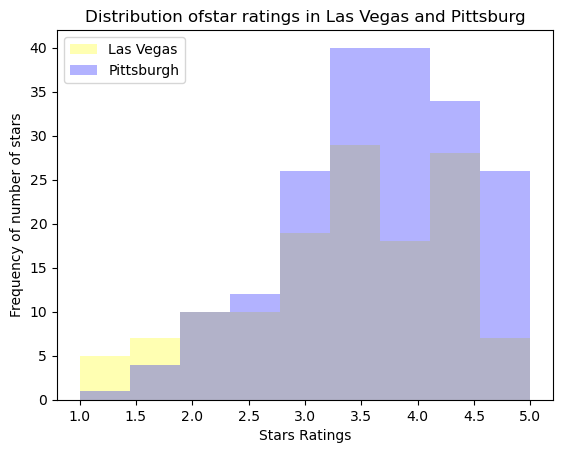

In [152]:
plt.hist(
    df_vegas,
    alpha = 0.3,
    color = 'yellow',
    label = 'Las Vegas',
    bins = 'auto'
)

plt.hist(
    df_pitt,
    alpha = 0.3,
    color = 'blue',
    label = 'Pittsburgh',
    bins = 'auto'
)

plt.legend(loc = 'best')
plt.xlabel('Stars Ratings')
plt.ylabel('Frequency of number of stars')
plt.title('Distribution ofstar ratings in Las Vegas and Pittsburg')

plt.show()

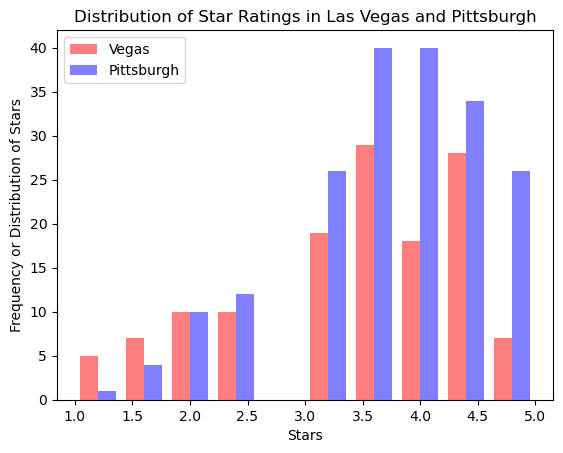

In [156]:
plt.hist(
    [df_vegas, df_pitt],
    label = ['Vegas', 'Pittsburgh'],
    color = ['red', 'blue'],
    alpha = 0.5,
    bins = 'auto'
)

plt.legend(loc = 'best')
plt.title('Distribution of Star Ratings in Las Vegas and Pittsburgh')
plt.xlabel('Stars')
plt.ylabel('Frequency or Distribution of Stars')

plt.show()

In [158]:
#Health & Medical
#Fast food
#Breakfast & Brunch
df_health = df[df['category_0'] == 'Health & Medical']
df_fast = df[df['category_0'] == 'Fast Food']
df_break = df[df['category_0'] == 'Breakfast & Brunch']

In [161]:
df_break.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state,rating
24,Gab & Eat,Breakfast & Brunch,Sandwiches,True,69,4.5,3,1,Carnegie,PA,9.0
131,Crepes Parisiennes,Breakfast & Brunch,Creperies,True,73,4.0,8,1,Pittsburgh,PA,8.0
240,Ritters Diner,Breakfast & Brunch,American (Traditional),True,146,3.5,8,1,Pittsburgh,PA,7.0
266,The Bloomfield Sandwich Shop,Breakfast & Brunch,Sandwiches,True,41,4.0,8,1,Pittsburgh,PA,8.0
268,The Dor-Stop Restaurant,Breakfast & Brunch,Diners,True,275,4.5,8,1,Pittsburgh,PA,9.0


In [193]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\Abdulqaadir\anaconda3\Lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['random', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


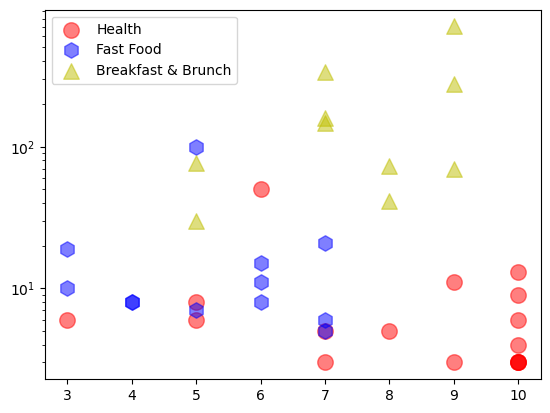

In [166]:
plt.scatter(
    df_health['rating'], df_health['review_count'],
    marker = 'o',
    color = 'r',
    alpha = 0.5,
    s = 124,
    label = 'Health'
)

plt.scatter(
    df_fast['rating'], df_fast['review_count'],
    marker = 'h',
    color = 'b',
    alpha = 0.5,
    s = 124,
    label = 'Fast Food'
)

plt.scatter(
    df_break['rating'], df_break['review_count'],
    marker = '^',
    color = 'y',
    alpha = 0.5,
    s = 124,
    label = 'Breakfast & Brunch'
)

plt.legend(loc = 'upper left')
plt.xlabel = 'Rating'
plt.ylabel = 'Review Count'
plt.title = "Scatter Plot of Relationship between 'Review Count' and 'Rating' across 3 Business Categories"

axes = plt.gca()
axes.set_yscale('log')

plt.show()

In [189]:
df_city_value_counts = df['city'].value_counts()

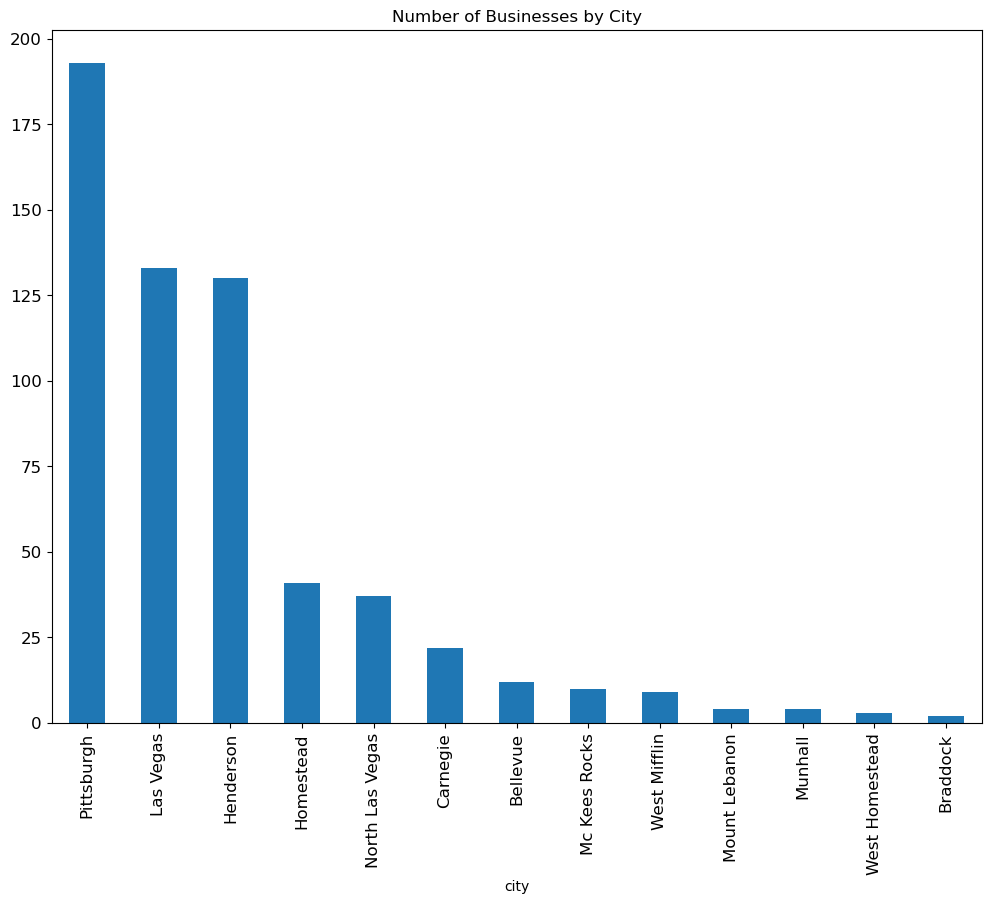

In [190]:
df_city_value_counts.plot(kind='bar', figsize = (12, 9), fontsize = 12, legend = False, title = 'Number of Businesses by City')
plt.ylabel = 'Number of Businesses'
plt.show()

In [184]:
df_filter = df.filter(['Restaurants', 'Bars', 'stars', 'category_0'])
df_cat_0 = df_filter[df_filter['category_0'].isin(['Restaurants', 'Bars'])]
df_bar_rest = pd.pivot_table(df_cat_0, index = ['category_0'])

In [179]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state,rating
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,Bellevue,PA,5.0
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,Bellevue,PA,9.0
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,Bellevue,PA,9.0
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,Bellevue,PA,8.0
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,Bellevue,PA,7.0


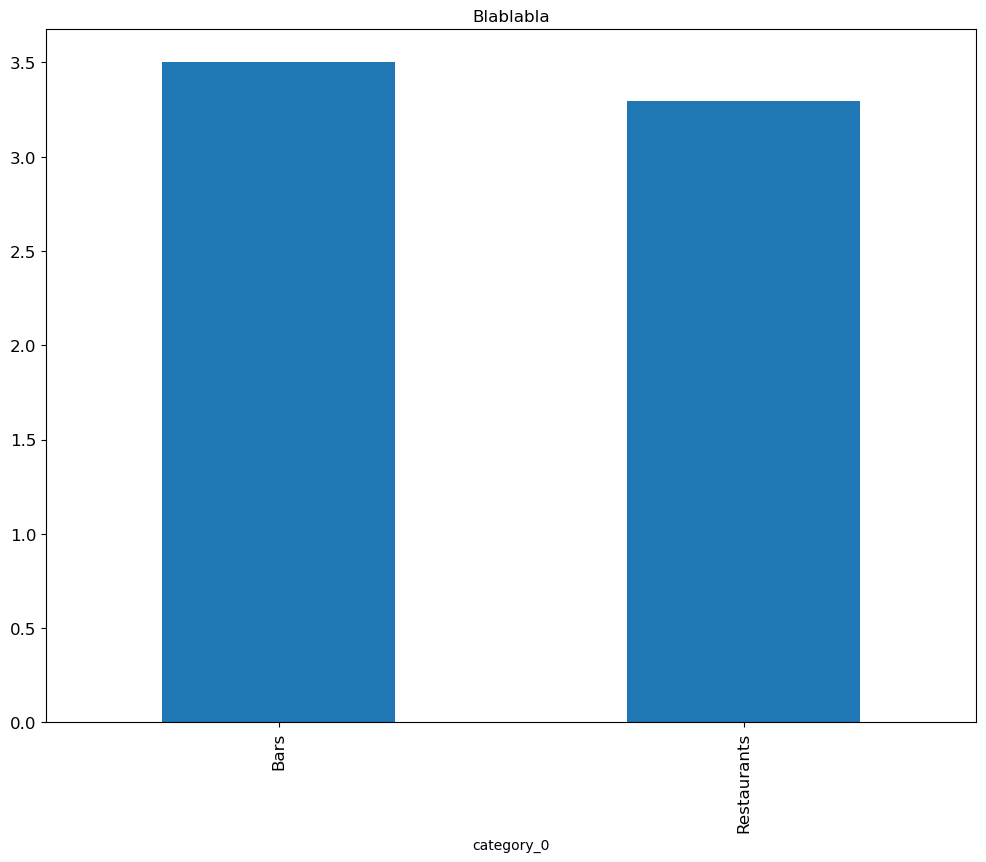

In [186]:
df_bar_rest.plot(kind='bar', figsize = (12, 9), fontsize = 12, legend = False, title = 'Blablabla')
plt.ylabel = 'Number of Businesses'
plt.show()

In [194]:
import pylab as pl

In [196]:
from sklearn import linear_model

In [197]:
reg = linear_model.LinearRegression()